### **1. ¿Cuándo usar ARIMA y cuándo usar SARIMA?**

- **ARIMA (Autoregressive Integrated Moving Average):**  
  Se utiliza para **series de tiempo no estacionales**. Es ideal cuando no hay patrones estacionales (repeticiones periódicas) claros en los datos, como por ejemplo, la evolución mensual del precio de un activo financiero.

- **SARIMA (Seasonal ARIMA):**  
  Se usa para **series de tiempo con estacionalidad**. Si tus datos tienen patrones que se repiten regularmente en intervalos definidos (por ejemplo, ventas que suben cada diciembre o temperaturas más altas en verano), entonces SARIMA es más apropiado porque incluye términos específicos para modelar la estacionalidad.

**Regla general:**  
- Usa **ARIMA** si los datos son no estacionales o ya se eliminaron patrones estacionales.  
- Usa **SARIMA** si hay patrones estacionales evidentes en los datos.

---

### **2. ¿Qué son las series de tiempo estacionales no estacionarias?**

- Una **serie estacional no estacionaria** presenta:
  - **Tendencia:** Los datos crecen o decrecen en promedio a lo largo del tiempo.  
  - **Estacionalidad:** Existe un patrón que se repite regularmente en intervalos específicos (ejemplo: trimestral, anual).  

**Ejemplo:** Las ventas de helados a lo largo de los años pueden tener una **tendencia creciente** (por aumento del mercado) y una **estacionalidad anual** (picos en verano).

Estas series requieren modelos como SARIMA, ya que permiten ajustar tanto la **tendencia (diferencias no estacionales)** como la **estacionalidad (diferencias estacionales)**.

---

### **3. ¿Por qué usamos tanto el modelo SARIMA?**

SARIMA es popular porque:
- Combina la capacidad de ARIMA para manejar series no estacionarias con un componente adicional que modela la **estacionalidad**.  
- Es flexible y puede ajustarse a muchas situaciones del mundo real que tienen tanto tendencia como estacionalidad.  
- Incluye parámetros para controlar:
  - Comportamiento a corto plazo (AR y MA).  
  - Tendencia (diferenciación no estacional, \(d\)).  
  - Patrones estacionales repetitivos (SAR, SMA, y diferenciación estacional, \(D\)).

---

### **4. Prueba de Ljung-Box: qué pasa si el p-valor es menor que el nivel de significancia**

- La prueba de Ljung-Box evalúa si los **residuos del modelo** están correlacionados.  
- **Si el p-valor < nivel de significancia (\( \alpha \), como 0.05):**
  - **Conclusión:** Rechazamos la hipótesis nula (que dice que los residuos son independientes). Esto implica que hay correlación significativa entre los residuos, lo cual indica que el modelo no ha capturado toda la estructura de los datos.

**Acciones si hay correlación en los residuos:**  
1. **Revisar el modelo:** Aumenta el orden de los términos \(p\) (autoregresivo) o \(q\) (media móvil) en ARIMA o SARIMA.  
2. **Incluir estacionalidad (si SARIMA no se usó):** Agregar componentes estacionales si los datos lo sugieren.  
3. **Evaluar datos de entrada:** Tal vez los datos no fueron suficientemente transformados (diferenciación insuficiente o estacionalidad no eliminada).  
4. **Probar otro modelo:** Intenta con otros enfoques como modelos SARIMAX (con variables exógenas) o modelos basados en aprendizaje automático (si los residuos siguen un patrón no lineal).  

---

### **5. Prueba de Ljung-Box: si los p-valores son mayores que 0.05**

Si **todos los p-valores > 0.05**, no rechazamos la hipótesis nula. Esto significa que:
- Los residuos son independientes y no tienen correlación significativa.  
- El modelo ajustado es adecuado para explicar la serie de tiempo.

En este caso, **no es necesario ajustar más el modelo**, porque los residuos ya actúan como **ruido blanco** (independientes, sin estructura que aprovechar).  

---

### **6. ¿Qué haríamos si los residuos no son ruido blanco?**

Si el modelo **no es suficiente**:
1. Ajustar parámetros (\(p, d, q, P, D, Q, s\)).  
2. Explorar otras transformaciones (logaritmos, eliminación de tendencia más agresiva).  
3. Probar técnicas más avanzadas como:
   - **SARIMAX** (con variables exógenas).  
   - Modelos de aprendizaje automático (ejemplo: LSTM o Prophet).  
   - Modelos híbridos (combinan estadística clásica y ML).

-----

-----

### Resumen del procedimiento para aplicar SARIMA

1. **Verificar estacionariedad y transformar la serie si es necesario**:  
   - Realizar la prueba ADF (Augmented Dickey-Fuller) para evaluar si la serie es estacionaria.
   - Si la serie no es estacionaria, aplicar diferenciación (diferencia de primer orden y, si es necesario, diferenciación estacional).  
   - Continuar hasta que los resultados de ADF indiquen estacionariedad (valor p < 0.05).

2. **Definir rangos de parámetros para SARIMA**:  
   - Configurar posibles valores para los parámetros \( p, q, P, Q \) (orden autoregresivo, media móvil y sus versiones estacionales).  
   - Usar la frecuencia de la serie \( m \) (por ejemplo, \( m=12 \) para datos mensuales).

3. **Ajustar modelos y seleccionar el mejor**:  
   - Probar combinaciones de parámetros utilizando el criterio AIC (Akaike Information Criterion).  
   - Seleccionar el modelo con el AIC más bajo, indicando mejor ajuste con penalización por complejidad.

4. **Validar el modelo ajustado**:  
   - Analizar los residuos del modelo mediante diagnósticos gráficos (verificar tendencia, normalidad y autocorrelación).  
   - Aplicar la prueba de Ljung-Box para asegurar que los residuos se asemejan a ruido blanco (independencia y no correlación).

5. **Pronosticar y evaluar el rendimiento**:  
   - Usar el modelo seleccionado para generar predicciones sobre un conjunto de prueba.  
   - Comparar los resultados con métodos alternativos (e.g., modelo ARIMA o un método ingenuo) utilizando métricas como el MAPE (Error Absoluto Medio Porcentual).  
   - Visualizar y comparar los pronósticos con los valores reales para evaluar la calidad del ajuste.

### Resumen conceptual del modelo SARIMA

- **Parámetros del modelo SARIMA**:  
   \( (p,d,q)(P,D,Q)_m \)  
   - \( p, q, d \): parámetros para modelar la serie no estacional.  
   - \( P, Q, D \): parámetros para modelar los patrones estacionales.  
   - \( m \): frecuencia de la estacionalidad (e.g., 12 para datos mensuales).  

- **Conclusión**:  
   El modelo SARIMA es una extensión del ARIMA que incluye componentes estacionales. Permite pronósticos precisos para series de tiempo estacionales no estacionarias.  

- **Próximo paso**:  
   Incluir variables externas (exógenas) con el modelo SARIMAX para mejorar la capacidad predictiva al considerar factores adicionales que puedan influir en la serie estudiada.


----

----

### Verificación de estacionariedad

```python
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Prueba ADF inicial
ad_fuller_result = adfuller(df['Passengers'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

# Diferenciación de primer orden
df_diff = np.diff(df['Passengers'], n=1)
ad_fuller_result = adfuller(df_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

# Diferenciación estacional
df_diff_seasonal_diff = np.diff(df_diff, n=12)
ad_fuller_result = adfuller(df_diff_seasonal_diff)
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
```

### Optimización de hiperparámetros para SARIMA

```python
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Definición de parámetros
ps = range(0, 4)
qs = range(0, 4)
Ps = range(0, 4)
Qs = range(0, 4)
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
d, D, s = 1, 1, 12
train = df['Passengers'][:-12]

def optimize_SARIMA(train, order_list, d, D, s):
    results = []
    for order in order_list:
        try:
            model = SARIMAX(train, order=(order[0], d, order[1]), 
                            seasonal_order=(order[2], D, order[3], s), 
                            simple_differencing=False)
            result = model.fit(disp=False)
            results.append((order, result.aic))
        except:
            continue
    return sorted(results, key=lambda x: x[1])

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
best_order = SARIMA_result_df[0][0]
print(f'Best SARIMA order: {best_order}')
```

### Ajuste del modelo SARIMA seleccionado

```python
# Mejor modelo
SARIMA_model = SARIMAX(train, order=(2, 1, 1), seasonal_order=(1, 1, 2, 12), 
                       simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

# Diagnóstico de residuos
SARIMA_model_fit.plot_diagnostics(figsize=(10, 8))
```

### Prueba Ljung-Box para residuos

```python
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = SARIMA_model_fit.resid
lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11))
print(f'Ljung-Box p-values: {pvalue}')
```

### Predicción y visualización

```python
SARIMA_pred = SARIMA_model_fit.get_prediction(start=132, end=143).predicted_mean
test['SARIMA_pred'] = SARIMA_pred

# Visualización
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df['Month'], df['Passengers'], label='Observed')
ax.plot(test['Passengers'], 'b-', label='Actual')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(2,1,1)(1,1,2,12)')
ax.set_xlabel('Date')
ax.set_ylabel('Number of air passengers')
ax.axvspan(132, 143, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.tight_layout()
```

### Comparación con otros modelos y cálculo de MAPE

```python
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_SARIMA = mape(test['Passengers'], test['SARIMA_pred'])

fig, ax = plt.subplots()
x = ['SARIMA(2,1,1)(1,1,2,12)']
y = [mape_SARIMA]
ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
plt.tight_layout()
```



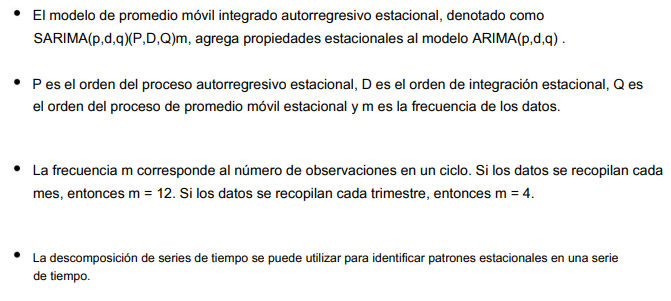

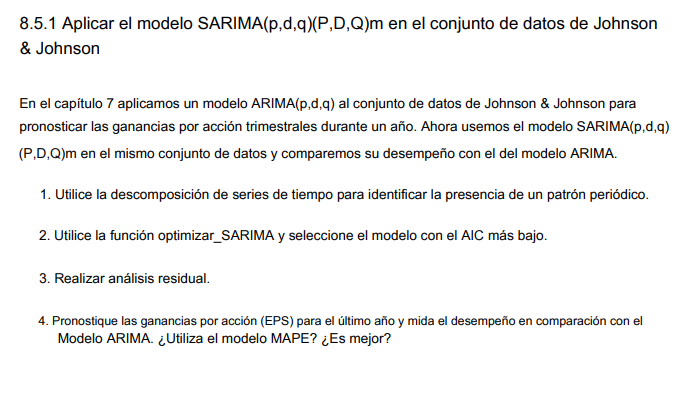

# SETUP:  FrameWorks / Librerias / Bibliotecas

In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
# Cargar el archivo CSV
jjdf = pd.read_csv(
    r"C:\Users\Usuario\Desktop\TimeSeriesForecastingInPython-master\data\jj.csv",
    parse_dates=True,    # Convierte automáticamente las fechas
    index_col="date"     # Especifica la columna 'date' como índice
)

print(jjdf.head())


            data
date            
1960-01-01  0.71
1960-04-01  0.63
1960-07-02  0.85
1960-10-01  0.44
1961-01-01  0.61


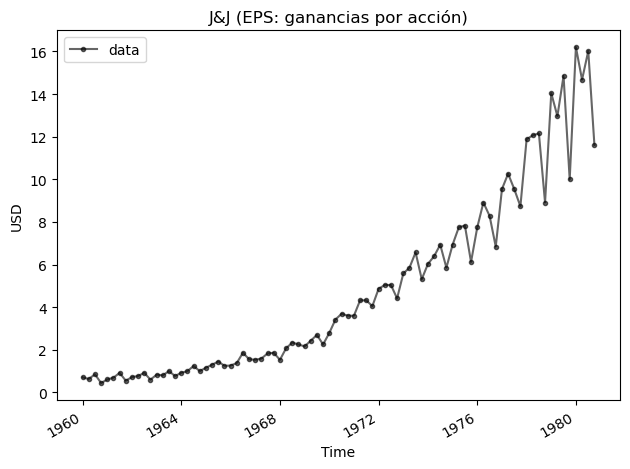

In [3]:

jjdf.plot(color = "black", linestyle = '-', marker = "o", markersize = 3, alpha = 0.6)
plt.title("J&J (EPS: ganancias por acción)")
plt.xlabel("Time")
plt.ylabel("USD")

plt.tight_layout()

plt.show()

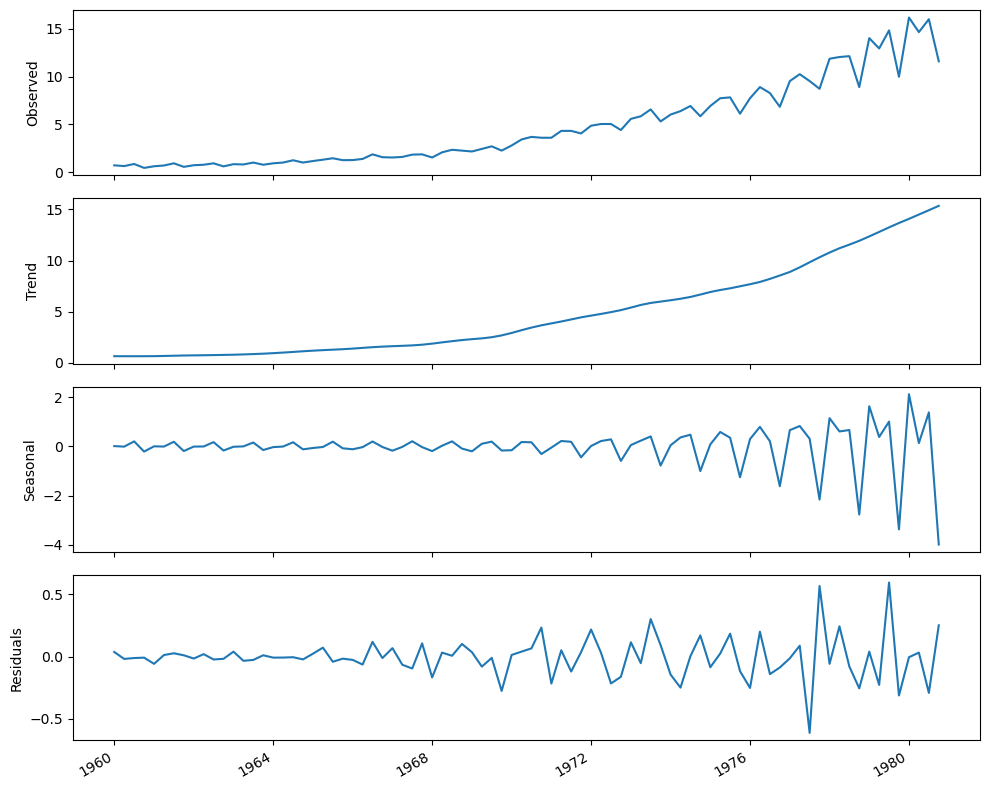

In [4]:
# 1) utilice la descomposición de series temporales para identificar un patron periodico (estacion?) :
# datos trimestrales
decomposition = STL(jjdf, period=4).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

fig.autofmt_xdate()
plt.tight_layout()


In [5]:
ad_fuller_result = adfuller(jjdf)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: 2.7420165734574766
p-value: 1.0


In [6]:
ad_fuller_result = adfuller(jjdf['data'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: 2.7420165734574766
p-value: 1.0


In [7]:
#  diferencias que se aplican a la serie origina
df_diff = np.diff(jjdf['data'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
# p valor mas alto que nivel de significancia. No tenemos evidencia suficiente para RHo #--> No estacionaria

ADF Statistic: -0.40740976363805087
p-value: 0.9088542416911297


En el código las variables "d" y "D" se utilizan para especificar los órdenes de diferenciación (o el número de veces que se aplica la diferencia) en un análisis de series temporales. 

- **"d" = 1** se refiere a la cantidad de diferencias que se aplican a la serie original (es decir, se calcula la diferencia de primer orden). Esto se realiza porque el ADF (Augmented Dickey-Fuller) prueba muestra que la serie original no es estacionaria, como indica el p-valor alto (1.0). Por lo tanto, la serie se diferencia una vez para tratar de hacerla estacionaria.

- **"D" = 1** se refiere a la cantidad de diferenciación estacional que se aplica a la serie. Esto es necesario cuando hay componentes estacionales en los datos que afectan la estacionariedad. En el caso, la diferencia estacional se aplica con un valor de "n=4" (generalmente, cuando los datos tienen una estacionalidad anual y están en una base "trimestral" [12/3] , se usa un valor de 4). Esto se hace para capturar la estacionalidad y, finalmente, hacer que la serie se vuelva estacionaria.

El proceso sigue hasta que se obtiene una serie estacionaria, lo cual se confirma cuando el ADF Statistic es significativamente negativo y el p-valor es bajo, indicando que ya no hay una raíz unitaria en la serie. Esto justifica el uso de "d" y "D" para diferenciar la serie y hacerla estacionaria.

por lo que al final como veremos

d = 1

D = 1

In [8]:
# diferenciación estacional
df_diff_seasonal_diff = np.diff(df_diff, n=4) # 4 = 12/3 = 360 días/90 días # datos trimestrales

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')
# p valor mas bajo que nivel de significancia # estacionalidad capturada # estacionaria

ADF Statistic: -6.032499262649961
p-value: 1.4070571055664787e-07


Mi proceso fue el siguiente:  

### **1. Qué hice**
1. **Primera diferenciación (`df_diff`)**  
   - Apliqué una diferenciación (\(d=1\)) a la serie `jjdf['data']` para eliminar posibles tendencias no estacionarias.  
   - Luego probé la estacionariedad utilizando el **test de Dickey-Fuller aumentado (ADF)**.  
   - **Resultado:** El p-valor fue mayor que el nivel de significancia (\( \alpha = 0.05\)), lo que indicó que la serie seguía siendo **no estacionaria**.

2. **Segunda diferenciación (`df_diff2`)**  
   - Realicé una segunda diferenciación (\(d=2\)) para eliminar cualquier patrón residual de no estacionariedad.  
   - Volví a aplicar el test ADF.  
   - **Resultado:** Obtuve un **ADF Statistic de -3.585** y un **p-valor de 0.006**, que es menor que 0.05.

---

### **2. Cómo interpreté los resultados**

#### **Test de Dickey-Fuller (ADF):**
- **Hipótesis nula (\(H_0\)):** La serie no es estacionaria.  
- **Hipótesis alternativa (\(H_a\)):** La serie es estacionaria.  

#### **Resultados finales:**
- Al obtener un **p-valor < 0.05** tras la segunda diferenciación:  
   - Rechacé la hipótesis nula (\(H_0\)) y concluí que la serie ahora es **estacionaria**.  
   - Esto significa que después de aplicar dos diferenciaciones (\(d=2\)), logré eliminar la tendencia y los patrones no estacionarios.

---

### **3. Conclusión práctica**

- Ahora sé que el parámetro \(d=2\) es el valor adecuado para usar en un modelo ARIMA o SARIMA.  
- El modelo resultante tendrá una diferenciación no estacional de \(d=2\), lo cual es necesario para trabajar con datos estacionarios.

---

### **4. Importancia de estos resultados**

1. **Modelado preciso:** Los modelos ARIMA/SARIMA necesitan datos estacionarios para ser efectivos. Si los datos no son estacionarios, las predicciones no serán confiables.  
2. **Evitar la sobre-diferenciación:** Si hubiera continuado diferenciando innecesariamente (\(d=3\) o más), habría introducido ruido en los datos, dificultando el modelado. Mi análisis mostró que \(d=2\) es suficiente, lo cual asegura un balance adecuado.

---

### **Próximos pasos**
1. Incorporar \(d=2\) en un modelo ARIMA/SARIMA y ajustar los demás parámetros (\(p, q\), y los estacionales si hay estacionalidad).  
2. Comprobar si los residuos del modelo son ruido blanco para confirmar que no hay patrones no capturados.  
3. Evaluar si es necesario incluir términos estacionales o variables adicionales dependiendo de la naturaleza de los datos.

Este proceso asegura que la serie sea completamente estacionaria y lista para el modelado. 😊

Text(0.5, 1.0, 'df_diff2')

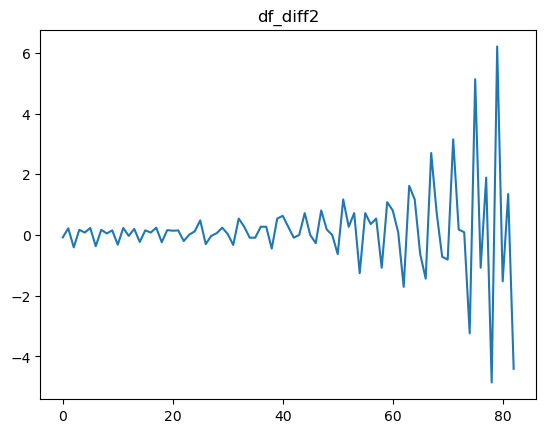

In [9]:
plt.plot(df_diff)
plt.title("df_diff2")

In [10]:
def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df


### producto cartesiano de elementos

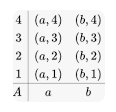

es una operación, que resulta en otro conjunto, cuyos elementos son todos los pares ordenados que pueden formarse

In [11]:
df = jjdf

"""
Cuando se dice "s = 4" en este contexto, significa que la serie tiene 4 datos por
ciclo estacional, lo cual corresponde a datos trimestrales. En este caso, si tenemos datos trimestrales, ya que cada ciclo 
estacional abarca 4 periodos (uno por cada trimestre del año), lo que justifica el valor s = 4 para indicar que el 
ciclo estacional es de 4 períodos.
"""

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
train = df[:-4]  # Tomamos todas las filas excepto las últimas 4 para el conjunto de entrenamiento
test = df[-4:]   # Tomamos las últimas 4 filas para el conjunto de prueba

# Definir los rangos de valores para los parámetros p, q, P, Q que se usarán en el modelo SARIMA
ps = range(0, 4, 1)  # Valores posibles para el parámetro p (autorreconocimiento no estacional). El rango va de 0 a 3.
qs = range(0, 4, 1)  # Valores posibles para el parámetro q (media móvil no estacional). El rango va de 0 a 3.
Ps = range(0, 4, 1)  # Valores posibles para el parámetro P (autorreconocimiento estacional). El rango va de 0 a 3.
Qs = range(0, 4, 1)  # Valores posibles para el parámetro Q (media móvil estacional). El rango va de 0 a 3.

# Crear una lista con todas las combinaciones posibles de los parámetros p, q, P, Q
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
# La función `product` de itertools genera el producto cartesiano de los rangos ps, qs, Ps y Qs. Esto crea todas las combinaciones posibles de estos parámetros.

# Parámetros adicionales para la diferenciación (d y D) y la estacionalidad (s)
d = 1   # Diferenciación no estacional. Este parámetro indica cuántas veces se diferencia la serie temporal para hacerla estacionaria. Se ha fijado en 1, lo que significa que se hace una diferenciación de primer orden.
D = 1   # Diferenciación estacional. Este parámetro indica cuántas veces se diferencia la serie temporal de forma estacional. También se ha fijado en 1.
s = 4   # Periodicidad estacional. Se ha fijado en 4 porque los datos son trimestrales, lo que significa que hay 4 puntos de datos por ciclo estacional. 


SARIMA_result_df = optimize_SARIMA(train['data'], SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q,P,Q)",AIC
0,"(3, 0, 2, 1)",88.846609
1,"(1, 2, 0, 0)",89.609996
2,"(3, 1, 0, 0)",89.677549
3,"(1, 3, 0, 0)",89.734026
4,"(2, 2, 0, 0)",90.178107
...,...,...
251,"(0, 0, 3, 2)",136.748839
252,"(0, 0, 2, 3)",136.768498
253,"(0, 0, 0, 0)",137.133568
254,"(0, 0, 1, 3)",137.761947


In [12]:
# Filtrar el DataFrame para obtener la fila con el AIC mínimo
best_SARIMA_model = SARIMA_result_df[SARIMA_result_df['AIC'] == SARIMA_result_df['AIC'].min()]

# Mostrar el resultado
print(best_SARIMA_model)


      (p,q,P,Q)        AIC
0  (3, 0, 2, 1)  88.846609


----

el DataFrame muestra un análisis de parámetros para un modelo SARIMA, evaluado en términos del criterio AIC (Akaike Information Criterion). Este criterio sirve para comparar modelos, donde valores más bajos de AIC indican un modelo con mejor ajuste y menor sobreajuste a los datos.

El autor seleccionó los parámetros **SARIMA(3,1,0)** con un **seasonal_order=(2,1,1,4)** porque esta combinación resultó en el valor más bajo de AIC, como se observa en el filtro aplicado al DataFrame para identificar la fila con el AIC mínimo:

```python
best_SARIMA_model = SARIMA_result_df[SARIMA_result_df['AIC'] == SARIMA_result_df['AIC'].min()]
```

### Elección de parámetros:
1. **Orden del modelo SARIMA:**
   - `(p, d, q)` define la parte no estacional del modelo:
     - **p (3)**: Número de términos autorregresivos.
     - **d (1)**: Diferenciación para hacer la serie estacionaria.
     - **q (0)**: Número de términos de media móvil.

   Este orden se ajusta a las características de la serie temporal observada, que puede tener tendencias o patrones no estacionales.

2. **Seasonal_order:**
   - `(P, D, Q, s)` define la parte estacional del modelo:
     - **P (2)**: Términos autorregresivos estacionales.
     - **D (1)**: Diferenciación estacional.
     - **Q (1)**: Términos de media móvil estacional.
     - **s (4)**: Periodicidad de la estacionalidad (en este caso, podría ser trimestral si se trabaja con datos anuales).

3. **Razón de selección:**
   - El autor probó diferentes combinaciones de parámetros (como indica el producto cartesiano de los parámetros) y evaluó cada uno usando AIC.
   - Seleccionó la combinación con el menor valor de AIC, que indica un buen balance entre ajuste al modelo y complejidad.

En resumen, los parámetros fueron seleccionados porque produjeron el mejor ajuste posible a la serie temporal según el criterio de AIC. Esto no solo mejora la precisión del modelo, sino que también minimiza el riesgo de sobreajuste.

In [13]:
SARIMA_model = SARIMAX(train['data'], order=(3,1,0), seasonal_order=(2,1,1,4), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                data   No. Observations:                   80
Model:             SARIMAX(3, 1, 0)x(2, 1, [1], 4)   Log Likelihood                 -37.423
Date:                             Thu, 05 Dec 2024   AIC                             88.847
Time:                                     14:38:10   BIC                            105.069
Sample:                                          0   HQIC                            95.324
                                              - 80                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8196      0.114     -7.161      0.000      -1.044      -0.595
ar.L2         -0.3659      

El **procedimiento** que seguí:

fue el ajuste de un modelo SARIMAX para predecir una serie temporal con estacionalidad y componentes autoregresivos (AR) y de medias móviles (MA). El modelo SARIMAX tiene dos partes:

1. **Parte no estacional**: El primer conjunto de parámetros `(3, 1, 0)` representa el orden del modelo AR (3), el número de diferencias (1) y el orden del modelo MA (0).
2. **Parte estacional**: El segundo conjunto de parámetros `(2, 1, 1, 4)` define el componente estacional del modelo. Esto significa que tiene un AR estacional de orden 2, una diferencia estacional de 1, un modelo MA estacional de orden 1, y un ciclo estacional de 4, lo que implica que los datos son trimestrales (4 periodos por ciclo).

Para ajustar el modelo, utilicé la función `SARIMAX.fit()`. Luego, obtuve el resumen del modelo ajustado, que incluye varias métricas clave para interpretar el ajuste del modelo.

### **Interpretación de los resultados**:

- **AIC (Criterio de Información de Akaike)**: Un valor bajo de AIC indica que el modelo es bueno. En este caso, el AIC es **88.843**, lo que sugiere que el modelo tiene un buen ajuste. Sin embargo, siempre es recomendable comparar este valor con otros modelos para asegurarse de que sea el mejor.
  
- **Coeficientes (coef)**: Los coeficientes AR y MA indican cómo las observaciones pasadas influyen en los valores actuales de la serie. Por ejemplo, el coeficiente `ar.L1` es **-0.8209**, lo que significa que el valor anterior tiene una relación negativa con el valor actual. También, los coeficientes estacionales `ar.S.L4` y `ar.S.L8` son significativos para la serie estacional.

- **Valores p (P>|z|)**: Estos valores indican la significancia estadística de cada coeficiente. Si el valor p es menor que 0.05, significa que el coeficiente es estadísticamente significativo. En este caso, muchos de los coeficientes AR y estacionales tienen valores p muy bajos (algunos son 0.000), lo que indica que son significativos y contribuyen al modelo.

- **Prueba de Ljung-Box (Q)**: Esta prueba mide la autocorrelación de los residuos. Con un valor de **Q = 0.07** y un p-valor de **0.79**, puedo concluir que no hay autocorrelación significativa en los residuos. Esto indica que el modelo está capturando bien las dependencias temporales de los datos.

- **Prueba de Jarque-Bera (JB)**: Evalúa si los residuos siguen una distribución normal. El p-valor de **0.00** indica que los residuos no son normales, lo que sugiere que el modelo no captura completamente alguna estructura no lineal o patrones en los datos.

### **Conclusión**:
El modelo ajustado es adecuado ya que los coeficientes son significativos y no hay autocorrelación en los residuos. Sin embargo, los residuos no son normales, lo que podría indicar que el modelo no captura completamente la estructura de los datos. A pesar de esto, el AIC bajo sugiere un buen ajuste, pero siempre es recomendable probar otros modelos y realizar validaciones cruzadas para asegurarse de que sea el mejor modelo.

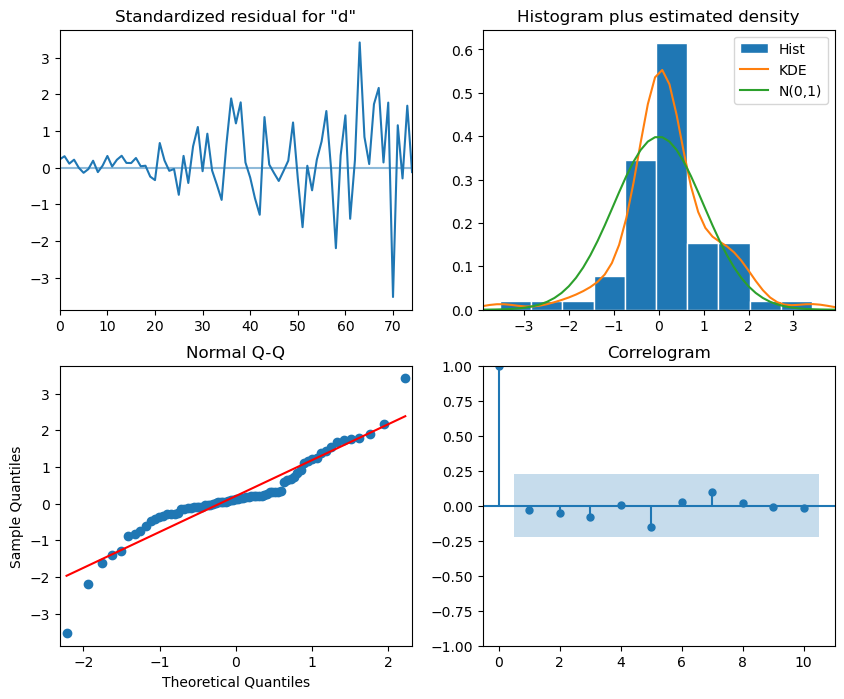

In [14]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8))
plt.show()

El gráfico presenta varios diagnósticos para evaluar la calidad de los residuos del modelo SARIMAX ajustado. Vamos a desglosarlo:

1. **Residual Estándarizado para "d"**:
   - Este gráfico muestra la evolución de los residuos estandarizados del modelo a lo largo del tiempo. Si el modelo es adecuado, los residuos deben ser aleatorios y no mostrar patrones sistemáticos. Si observas grandes oscilaciones o tendencias, esto podría indicar que el modelo no captura bien las dependencias de los datos.

2. **Histograma con densidad estimada**:
   - El histograma muestra la distribución de los residuos, mientras que la línea de densidad estimada (KDE) muestra una aproximación de la distribución subyacente. La línea verde representa una distribución normal estándar (media 0 y desviación estándar 1). Si los residuos se ajustan bien a una distribución normal, el histograma y la densidad estimada deberían coincidir con la curva verde.

3. **Gráfico Q-Q**:
   - El gráfico Q-Q compara la distribución empírica de los residuos con la normal teórica. Si los puntos siguen una línea recta, los residuos tienen una distribución normal. Si los puntos se desvían considerablemente de la línea, esto sugiere que los residuos no siguen una distribución normal, lo cual es un posible indicio de que el modelo no captura completamente la estructura de los datos.

4. **Correlograma**:
   - El correlograma muestra la autocorrelación de los residuos en diferentes lags. Si los residuos están correctamente modelados, no debe haber autocorrelación significativa (es decir, los valores deben estar cerca de cero en todas las distancias de tiempo). Si ves barras altas o significativas, significa que hay autocorrelación y que el modelo podría no haber capturado correctamente algunas dependencias en los datos.

### Conclusión:
- Si los residuos tienen un comportamiento errático (en el gráfico de residuos estandarizados) o muestran una distribución no normal (en el Q-Q plot o el histograma), el modelo podría no ser adecuado.
- Si los residuos presentan autocorrelación (en el correlograma), eso también podría indicar que el modelo no captura todas las dependencias temporales de la serie.

Es importante revisar estos gráficos para ajustar el modelo y verificar si es necesario probar con un modelo diferente o realizar ajustes adicionales.

In [15]:
residuals = SARIMA_model_fit.resid

lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(pvalue)

SARIMA_pred = SARIMA_model_fit.get_prediction(80, 83).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test


residuals: 
 date
1960-01-01    0.710000
1960-04-01   -0.080000
1960-07-02    0.220000
1960-10-01   -0.410000
1961-01-01   -0.185001
                ...   
1978-10-01   -1.366691
1979-01-01    0.446206
1979-04-02   -0.114921
1979-07-02    0.652287
1979-10-01   -0.047918
Length: 80, dtype: float64 

resd. [ 0.71       -0.07999986  0.21999985 -0.40999977 -0.18500057  0.16000012
  0.13618221  0.04692451  0.0886641  -0.00303333 -0.05829907 -0.01756122
  0.07564964 -0.05068339  0.02097497  0.12795301  0.01140039  0.08552398
  0.12906302  0.05073142  0.04914881  0.10421935  0.01397071  0.01984338
 -0.09842444 -0.13627966  0.26579488  0.07648241 -0.03558673 -0.01558694
 -0.29402297  0.12555951 -0.16598358  0.22809725  0.43595095 -0.03935277
  0.36290772 -0.03216361 -0.18386762 -0.34674588  0.24700945  0.73924454
  0.47170045  0.69650155  0.05456098 -0.10638477 -0.32734236 -0.50322377
  0.53747917  0.03200915 -0.0583115  -0.14282524 -0.03702737  0.07320354
  0.47874234 -0.11436322 -0.63286842 

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_SARIMA = mape(test['data'], test['SARIMA_pred'])

print(mape_SARIMA)